<a href="https://colab.research.google.com/github/XTMay/ML_DL/blob/main/Lecture_4/Linear_Algorithms_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Algorithms Practice
### Financial Forecasting (Stock Prices)

In [2]:
# This library will enable us to extract and call different data from the Yahoo website
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf  # We will use this library to upload latest data from Yahoo API
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
# define the ticker you will use
nio = yf.Ticker('NIO')
#Display stock information, it will give you a summary description of the ticker
nio.info

{'address1': 'Building 19',
 'address2': 'No. 1355, Caobao Road Minhang District',
 'city': 'Shanghai',
 'country': 'China',
 'phone': '86 21 6908 2018',
 'website': 'https://www.nio.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'NIO Inc. designs, develops, manufactures, and sells smart electric vehicles in China, Europe, and internationally. It offers five and six-seater electric SUVs, as well as smart electric sedans. The company also offers power solutions, including Power Home, a home charging solution; Power Swap, a battery-swapping service; Power Charger and Destination Charger; Power Mobile, a mobile charging service through charging vans; Power Map, an application that provides access to a network of public chargers and their real-time information; and One Click for power valet serv

In [ ]:
history = nio.history(period="max")
df = pd.DataFrame(history)
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.60,66849000,0.0,0.0
2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.60,158346500,0.0,0.0
2018-09-14 00:00:00-04:00,12.66,13.80,9.22,9.90,172473600,0.0,0.0
2018-09-17 00:00:00-04:00,9.61,9.75,8.50,8.50,56323900,0.0,0.0
2018-09-18 00:00:00-04:00,8.73,9.10,7.67,7.68,41827600,0.0,0.0
2018-09-19 00:00:00-04:00,7.88,9.15,7.54,8.50,48306500,0.0,0.0
2018-09-20 00:00:00-04:00,9.07,9.47,8.42,8.78,40275000,0.0,0.0
2018-09-21 00:00:00-04:00,9.05,9.07,8.50,8.59,15118500,0.0,0.0
2018-09-24 00:00:00-04:00,8.32,8.39,7.85,7.87,16297900,0.0,0.0


In [ ]:
# defining x and y
x = df.index
y = df['Close']
y

Date
2018-09-12 00:00:00-04:00     6.60
2018-09-13 00:00:00-04:00    11.60
2018-09-14 00:00:00-04:00     9.90
2018-09-17 00:00:00-04:00     8.50
2018-09-18 00:00:00-04:00     7.68
                             ...  
2024-07-26 00:00:00-04:00     4.43
2024-07-29 00:00:00-04:00     4.39
2024-07-30 00:00:00-04:00     4.42
2024-07-31 00:00:00-04:00     4.44
2024-08-01 00:00:00-04:00     4.06
Name: Close, Length: 1481, dtype: float64

In [ ]:
# Data Exploration
# i like to set up a plot function so i can reuse it at later stages of this analysis
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

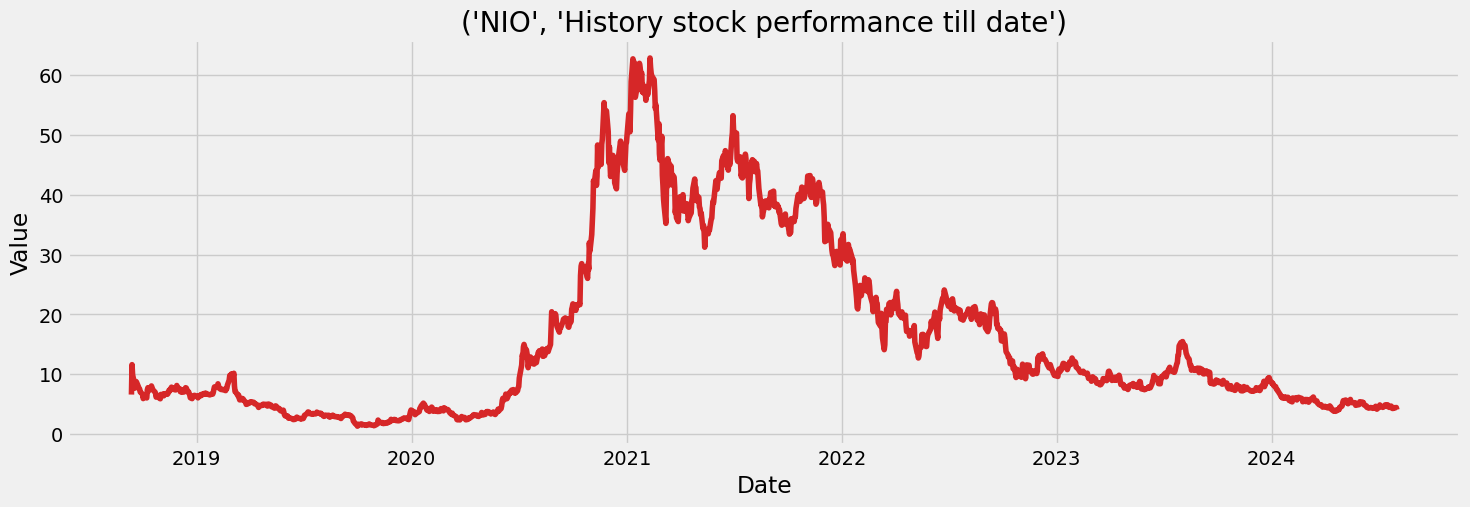

In [ ]:
stock_name= "NIO"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [ ]:
# Data Processing and scaling
df.reset_index(inplace=True) # to reset index and convert it to column

In [ ]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.6,66849000,0.0,0.0
1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.6,158346500,0.0,0.0


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [ ]:
df.drop(columns=['Dividends','Stock Splits']).head(2) # We are dropping un necessary columns from the set

,Date,Open,High,Low,Close,Volume
0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.6,66849000
1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.6,158346500


In [ ]:
df.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1481.000000,1481.000000,1481.000000,1481.000000,1.481000e+03,1481.0,1481.0
mean,16.127670,16.628217,15.576799,16.109278,6.145351e+07,0.0,0.0
std,14.859033,15.283490,14.351689,14.834057,5.411895e+07,0.0,0.0
min,1.190000,1.450000,1.190000,1.320000,5.111000e+06,0.0,0.0
25%,5.250000,5.370000,5.040000,5.220000,3.302310e+07,0.0,0.0
50%,9.430000,9.700000,9.120000,9.390000,4.871580e+07,0.0,0.0
75%,21.600000,22.090000,20.790001,21.559999,7.217330e+07,0.0,0.0
max,64.949997,66.989998,62.189999,62.840000,5.771851e+08,0.0,0.0


In [ ]:
print(len(df))


1481


In [ ]:
x = df[['Open', 'High','Low', 'Volume']]
y = df['Close']

In [ ]:
# Linear regression Model for stock prediction
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [ ]:
# let's check if total observation makes sense
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1258, 4)
(223, 4)
(1258,)
(223,)


In [ ]:
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import confusion_matrix, accuracy_score # type: ignore

regression = LinearRegression()
regression.fit(train_x, train_y)

print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-6.55090236e-01  9.42258634e-01  7.08107805e-01 -1.27252836e-10]
regression intercept -0.01693410530625883


In [ ]:
predicted=regression.predict(test_x)
print(test_x.head())

       Open   High    Low     Volume
1258  10.20  10.47  10.06   36890000
1259  10.15  10.38  10.14   26475900
1260  10.53  10.72  10.29   40061100
1261  10.37  10.47  10.22   22615000
1262   9.54   9.60   8.41  215935800


In [ ]:
predicted.shape


(223,)

In [ ]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
1258,10.07,10.285464
1259,10.38,10.291389
1260,10.43,10.467310
1261,10.31,10.289213
1262,8.55,8.706896
1263,8.82,8.905009
1264,8.45,8.476254
1265,8.53,8.528352
1266,8.35,8.266700
1267,8.41,8.338549


In [ ]:
dfr.describe()


,Actual_Price,Predicted_Price
count,223.000000,223.000000
mean,6.227848,6.221362
std,1.645340,1.652764
min,3.800000,3.820206
25%,4.715000,4.700805
50%,5.790000,5.777752
75%,7.585000,7.636759
max,10.430000,10.467310


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 0.07248877757185689
Mean Squared Error (MSE) : 0.009213795163590156
Root Mean Squared Error (RMSE): 0.0959885157901202


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  100.10424068923733


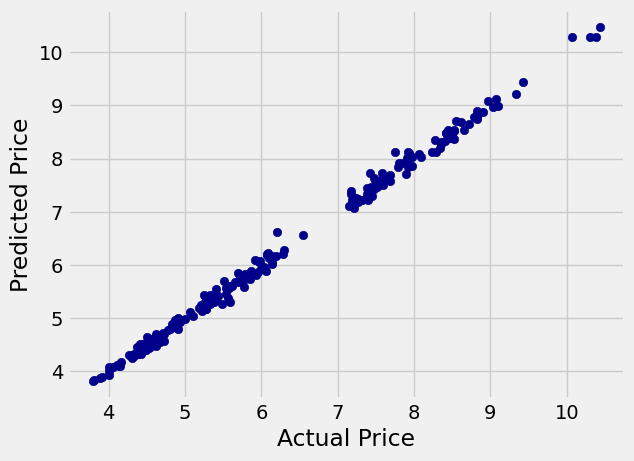

In [ ]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

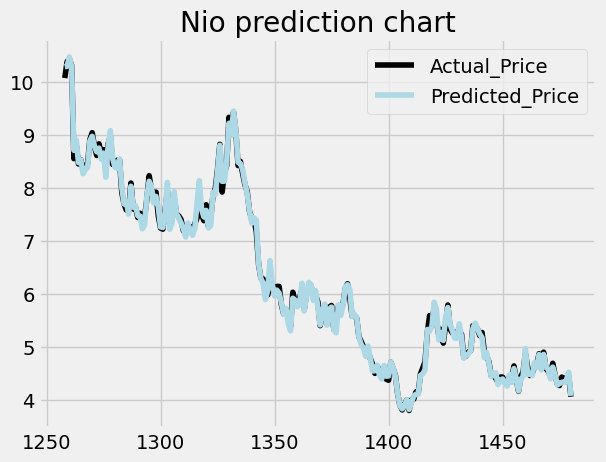

In [ ]:
plt.plot(dfr.Actual_Price, color='black', label='Actual_Price')
plt.plot(dfr.Predicted_Price, color='lightblue', label='Predicted_Price')
plt.title("Nio prediction chart")
plt.legend()

## Add instruction, explaination for each step

## Logistic Regression Practice
### Predicting whether a customer will subscribe to Term Deposits

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.



In [ ]:
data = pd.read_csv('/Users/xiaotingzhou/Downloads/banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [ ]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [ ]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

#### Data exploration


In [ ]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

/var/folders/48/zcq5ydb90d53q6sd6g4zy7f00000gn/T/ipykernel_21892/1426912983.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y',data=data, palette='hls')


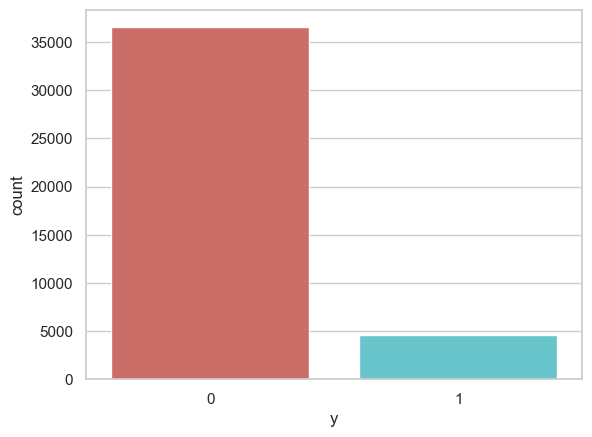

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
data.fillna(method='bfill', inplace=True)

/var/folders/48/zcq5ydb90d53q6sd6g4zy7f00000gn/T/ipykernel_21892/67549027.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
data.groupby('y')['y'].mean()

y
0    0.0
1    1.0
Name: y, dtype: float64

In [ ]:
data.groupby('job')['age'].mean()

job
admin.           38.187296
blue-collar      39.555760
entrepreneur     41.723214
housemaid        45.500000
management       42.362859
retired          62.027326
self-employed    39.949331
services         37.926430
student          25.894857
technician       38.507638
unemployed       39.733728
unknown          45.563636
Name: age, dtype: float64

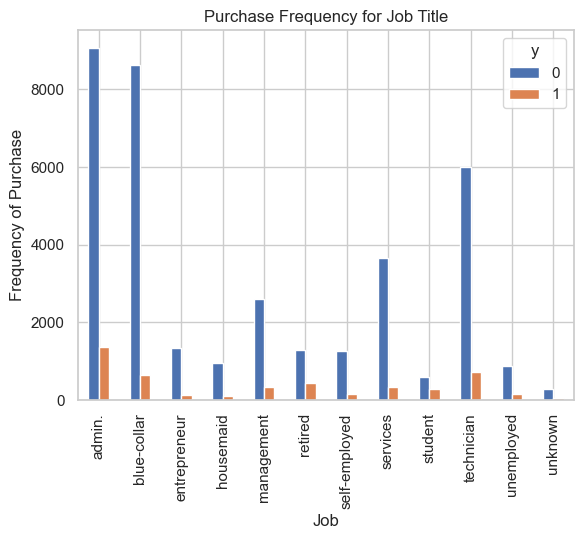

In [ ]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

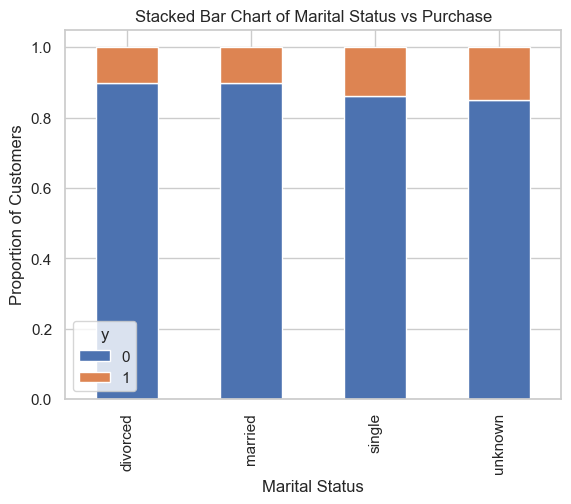

In [ ]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

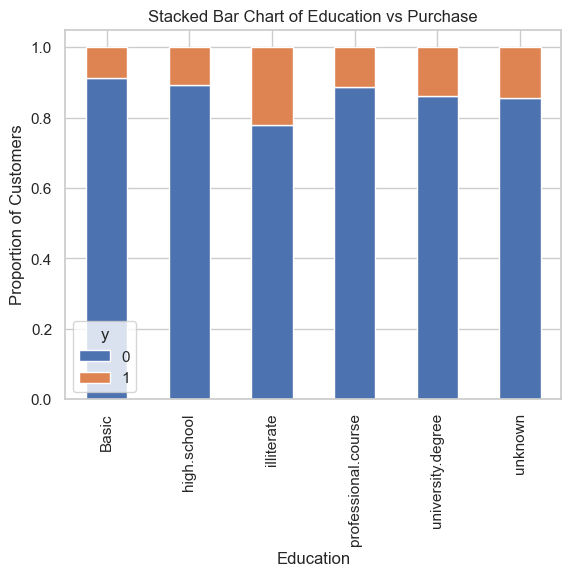

In [ ]:

table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

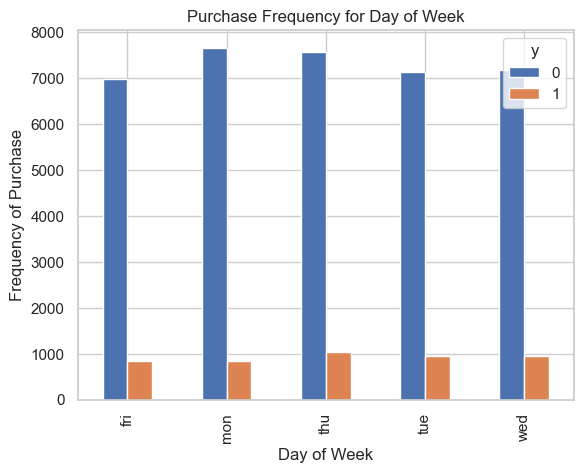

In [ ]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

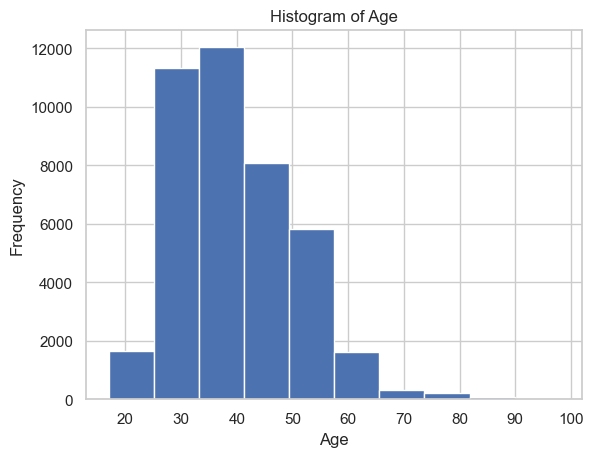

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

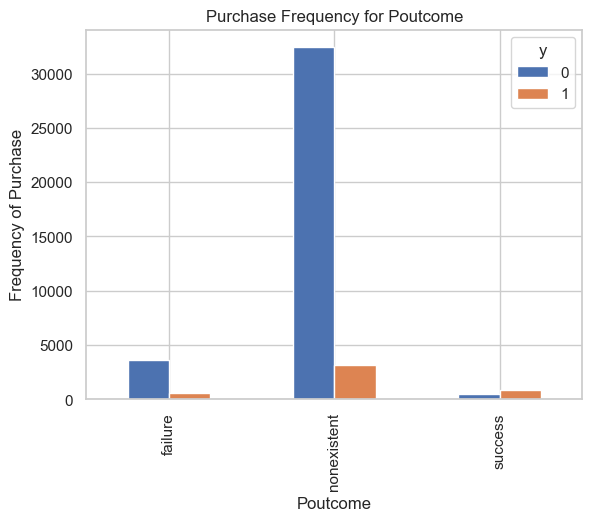

In [ ]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

#### Create dummy variables


In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

#### Feature Selection

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=800)

rfe = RFE(estimator=model, n_features_to_select=18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False False  True False False
 False False False False False  True False  True  True  True False False
  True  True  True False False False  True False False False  True  True
  True]
[34 36 13 39  1 17 24 19  1 28 33  1  6 38 37  1 35  1  1 26 29 41 12 20
 31 44  7  8 40  9 32 23  3  1 43 42 15 16 27 22 21  1 18  1  1  1 14  2
  1  1  1 30  4 25  1 11 10  5  1  1  1]


/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

In [ ]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no",
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed",
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"]
X=data_final[cols]
y=data_final['y']

#### Implementing the model


In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


#### Logistic Regression Model Fitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.90


### Cross Validation


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()

scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)

print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.896


#### Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872   109]
 [ 1123   253]]


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.70      0.18      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



### ROC Curvefrom sklearn import metrics


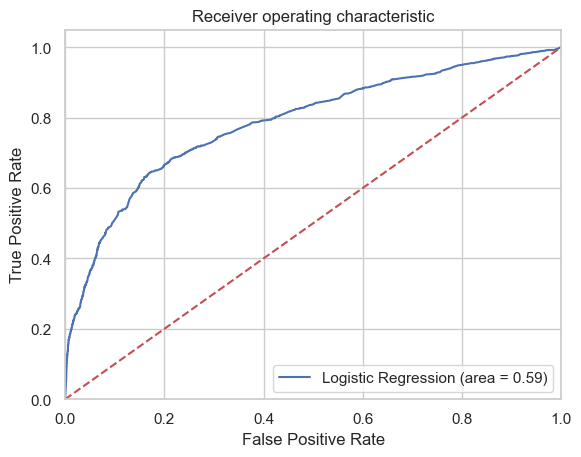

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()